
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [35]:
student_number = '400101175'
first_name = 'Mohammad Armin'
last_name = 'Dehghan'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [36]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
%matplotlib inline
sns.set(style="whitegrid")


In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [37]:
data = pd.read_csv('spotify.csv')
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [38]:
data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [39]:
features_to_retain = ['track_name','track_artist', 'danceability', 'energy', 'track_popularity' ,'playlist_genre', 'playlist_subgenre','key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']  # Replace with actual feature names

data_filtered = data[features_to_retain]

data_filtered.head()



,track_name,track_artist,danceability,energy,track_popularity,playlist_genre,playlist_subgenre,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,0.748,0.916,66,pop,dance pop,6,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,Maroon 5,0.726,0.815,67,pop,dance pop,11,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,Zara Larsson,0.675,0.931,70,pop,dance pop,1,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,0.718,0.930,60,pop,dance pop,7,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,0.650,0.833,69,pop,dance pop,1,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [40]:
label_encoder = LabelEncoder()

categorical_features = ['track_artist', 'playlist_genre', 'playlist_subgenre']
for feature in categorical_features:
    data_filtered[feature] = label_encoder.fit_transform(data_filtered[feature])
data_filtered.head()

/var/folders/pb/xcrcc8xd6cb1f5z_scjm3yq80000gn/T/ipykernel_7097/2377133487.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[feature] = label_encoder.fit_transform(data_filtered[feature])
/var/folders/pb/xcrcc8xd6cb1f5z_scjm3yq80000gn/T/ipykernel_7097/2377133487.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[feature] = label_encoder.fit_transform(data_filtered[feature])
/var/folders/pb/xcrcc8xd6cb1f5z_scjm3yq80000gn/T/ipykernel_7097/2377133487.py:5: SettingWithCopyWarning:

,track_name,track_artist,danceability,energy,track_popularity,playlist_genre,playlist_subgenre,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,2782,0.748,0.916,66,2,3,6,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,6084,0.726,0.815,67,2,3,11,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,10416,0.675,0.931,70,2,3,1,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,9215,0.718,0.930,60,2,3,7,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,5402,0.650,0.833,69,2,3,1,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [41]:
def standard_scale(data):
    return (data - data.mean()) / data.std()

needed_features = ['track_artist', 'danceability', 'energy', 
                      'track_popularity' ,'playlist_genre', 'playlist_subgenre','key', 
                      'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'] 


data_filtered[needed_features] = standard_scale(data_filtered[numerical_features])


/var/folders/pb/xcrcc8xd6cb1f5z_scjm3yq80000gn/T/ipykernel_7097/2559043418.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered[needed_features] = standard_scale(data_filtered[numerical_features])


In [42]:
data_filtered

,track_name,track_artist,danceability,energy,track_popularity,playlist_genre,playlist_subgenre,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,-0.810832,0.642039,1.201596,0.941517,-0.259072,-1.265957,0.173197,1.367103,-0.481355,-0.333893,-0.377947,-0.809217,0.031907,0.042926,-0.518866
1,Memories - Dillon Francis Remix,0.252901,0.490404,0.643307,0.981542,-0.259072,-1.265957,1.557603,0.585758,-0.688631,-0.468663,-0.359172,1.081044,0.782510,-0.777186,-1.056252
2,All the Time - Don Diablo Remix,1.648446,0.138887,1.284510,1.101619,-0.259072,-1.265957,-1.211209,1.100073,-0.324417,-0.436792,-0.377843,-0.519554,0.439377,0.116225,-0.822004
3,Call You Mine - Keanu Silva Remix,1.261546,0.435264,1.278982,0.701364,-0.259072,-1.265957,0.450078,0.984294,-0.050023,-0.667632,-0.377905,0.089580,-1.001780,0.039953,-0.947735
4,Someone You Loved - Future Humans Remix,0.033196,-0.033425,0.742804,1.061593,-0.259072,-1.265957,-1.211209,0.685141,-0.702450,-0.432694,-0.377947,-0.692574,0.919763,0.115035,-0.614163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,City Of Lights - Official Radio Edit,0.137250,-1.563559,1.234761,-0.019095,-1.429501,0.941684,-0.934327,1.641494,-0.132934,-0.449540,-0.377947,-0.799497,-1.289154,0.270925,-0.358071
32829,Closer - Sultan & Ned Shepard Remix,1.225143,-0.915665,0.483007,-0.899656,-1.429501,0.941684,-1.488090,0.755411,-0.642241,-0.790519,-0.358904,1.197687,-0.474214,0.266130,2.127890
32830,Sweet Surrender - Radio Edit,1.110459,-0.867417,0.676473,-1.139809,-1.429501,0.941684,0.173197,0.609181,-0.582032,-0.306574,-0.377942,-0.260348,-0.319804,0.264197,-0.262189
32831,Only For You - Maor Levi Remix,0.270941,-0.198845,1.046823,-1.099784,-1.429501,0.941684,-0.934327,1.123832,0.019069,-0.762245,0.188435,0.990322,-0.868816,0.264904,2.367085


# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

In [43]:
# Separating track names for later use (if needed)
track_names = data_filtered['track_name']
data_features = data_filtered.drop(columns=['track_name'])
data_features

,track_artist,danceability,energy,track_popularity,playlist_genre,playlist_subgenre,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,-0.810832,0.642039,1.201596,0.941517,-0.259072,-1.265957,0.173197,1.367103,-0.481355,-0.333893,-0.377947,-0.809217,0.031907,0.042926,-0.518866
1,0.252901,0.490404,0.643307,0.981542,-0.259072,-1.265957,1.557603,0.585758,-0.688631,-0.468663,-0.359172,1.081044,0.782510,-0.777186,-1.056252
2,1.648446,0.138887,1.284510,1.101619,-0.259072,-1.265957,-1.211209,1.100073,-0.324417,-0.436792,-0.377843,-0.519554,0.439377,0.116225,-0.822004
3,1.261546,0.435264,1.278982,0.701364,-0.259072,-1.265957,0.450078,0.984294,-0.050023,-0.667632,-0.377905,0.089580,-1.001780,0.039953,-0.947735
4,0.033196,-0.033425,0.742804,1.061593,-0.259072,-1.265957,-1.211209,0.685141,-0.702450,-0.432694,-0.377947,-0.692574,0.919763,0.115035,-0.614163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,0.137250,-1.563559,1.234761,-0.019095,-1.429501,0.941684,-0.934327,1.641494,-0.132934,-0.449540,-0.377947,-0.799497,-1.289154,0.270925,-0.358071
32829,1.225143,-0.915665,0.483007,-0.899656,-1.429501,0.941684,-1.488090,0.755411,-0.642241,-0.790519,-0.358904,1.197687,-0.474214,0.266130,2.127890
32830,1.110459,-0.867417,0.676473,-1.139809,-1.429501,0.941684,0.173197,0.609181,-0.582032,-0.306574,-0.377942,-0.260348,-0.319804,0.264197,-0.262189
32831,0.270941,-0.198845,1.046823,-1.099784,-1.429501,0.941684,-0.934327,1.123832,0.019069,-0.762245,0.188435,0.990322,-0.868816,0.264904,2.367085


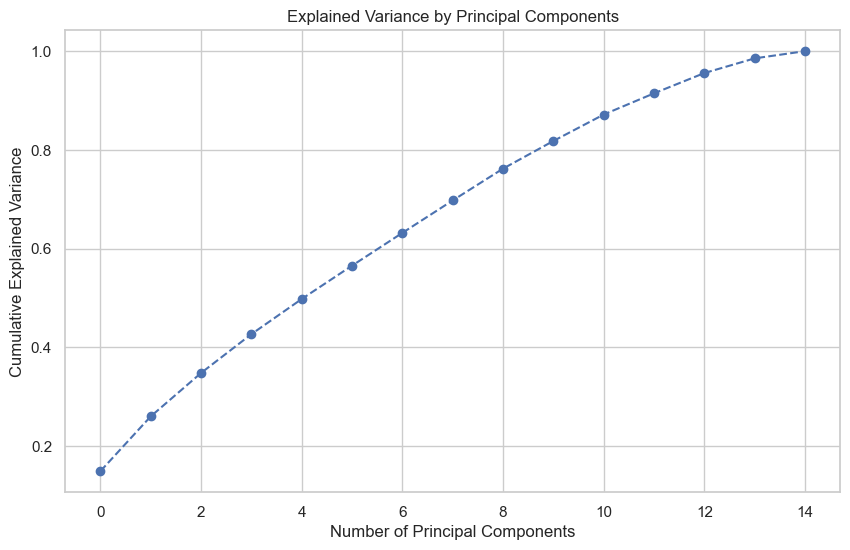

Number of principal components to retain: 13
Shape of the reduced data: (32833, 13)


In [44]:
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA()
pca.fit(data_features)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
num_components_to_retain = np.argmax(cumulative_explained_variance >= 0.95) + 1

print(f'Number of principal components to retain: {num_components_to_retain}')

pca = PCA(n_components=num_components_to_retain)
data_reduced = pca.fit_transform(data_features)

print(f'Shape of the reduced data: {data_reduced.shape}')

# Clustering

Implement K-means for clustering from scratch.

In [45]:
def initialize_centroids(data, k):
    """Randomly initialize k centroids from the data points."""
    np.random.seed(42)
    random_indices = np.random.permutation(data.shape[0])
    centroids = data[random_indices[:k]]
    return centroids

def assign_clusters(data, centroids):
    """Assign clusters based on the nearest centroid."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    """Update centroids by calculating the mean of all points assigned to each centroid."""
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def kmeans(data, k, max_iters=100):
    """K-Means clustering algorithm."""
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels


Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

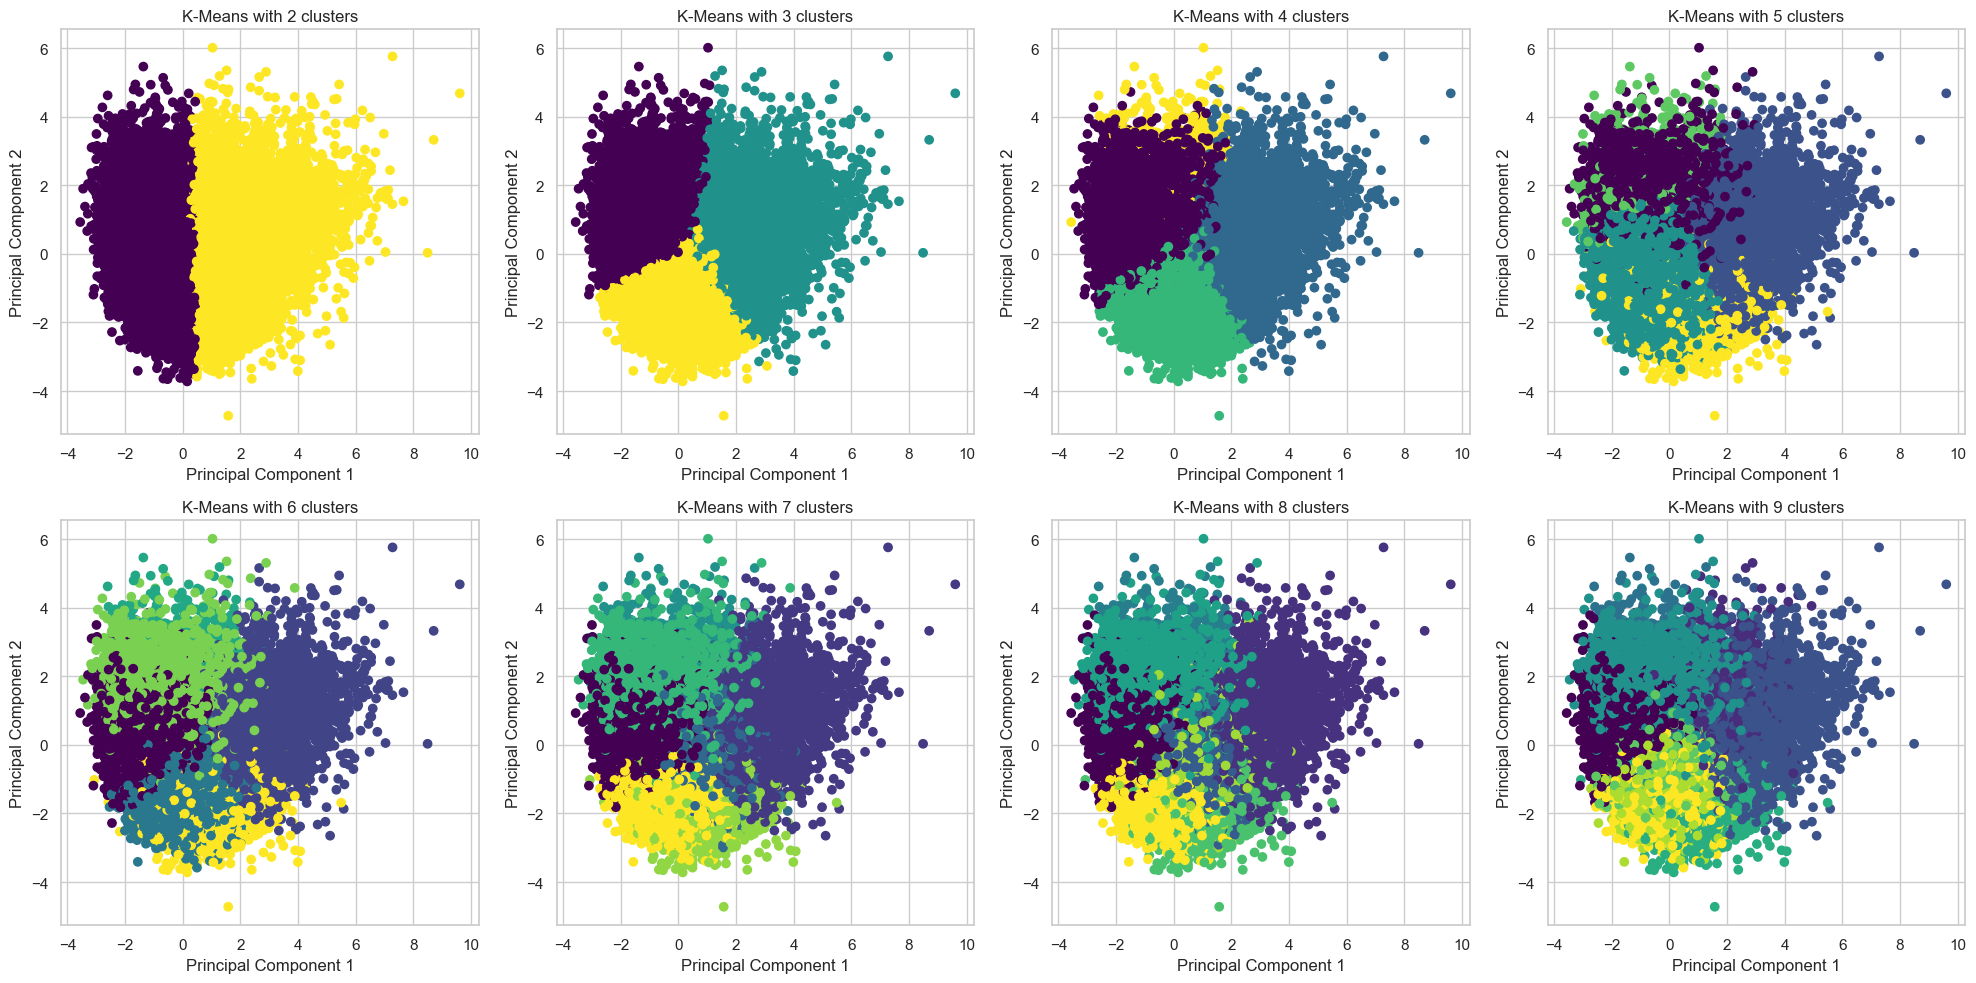

In [46]:
data_array = data_features.to_numpy()

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_array)

cluster_range = range(2, 10)

fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()

for i, k in enumerate(cluster_range):
    centroids, labels = kmeans(data_array, k)
    axs[i].scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', marker='o')
    axs[i].set_title(f'K-Means with {k} clusters')
    axs[i].set_xlabel('Principal Component 1')
    axs[i].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).

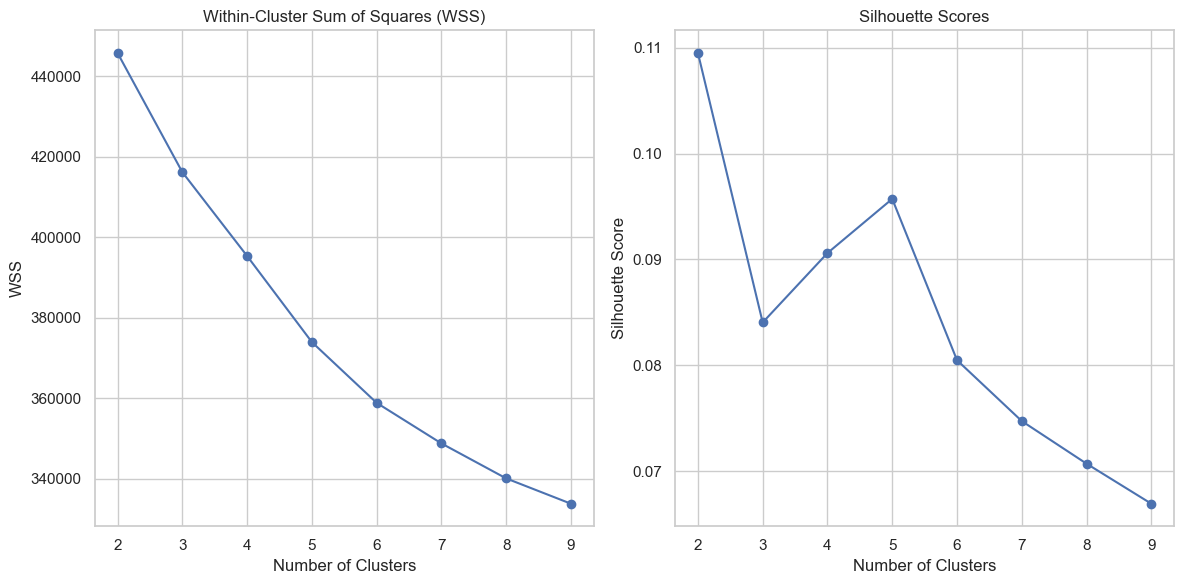

In [47]:
from sklearn.metrics import silhouette_score
wss = []
silhouette_scores = []

cluster_range = range(2, 10)

for k in cluster_range:
    centroids, labels = kmeans(data_array, k)

    wss_score = np.sum(np.min(np.linalg.norm(data_array[:, np.newaxis] - centroids, axis=2), axis=1)**2)
    wss.append(wss_score)
    
    silhouette_avg = silhouette_score(data_array, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, wss, marker='o')
plt.title('Within-Cluster Sum of Squares (WSS)')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

## Analysis

1. **WSS Plot**:
   - The WSS plot shows a noticeable change in slope around 4 to 5 clusters. This suggests that adding more clusters beyond this point provides diminishing returns.

2. **Silhouette Score Plot**:
   - The highest Silhouette score is observed for 2 clusters, but it decreases significantly for 3 clusters.
   - The score increases again slightly for 4 and 5 clusters, suggesting these might be better choices.

## Conclusion

From both plots, we can infer that the optimal number of clusters is likely around 4 or 5. These values offer a good balance between within-cluster variance and cluster separation.




# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [48]:
optimal_k = 5

centroids_optimal, labels_optimal = kmeans(data_array, optimal_k)

data_filtered['Cluster'] = labels_optimal

def select_two_songs_per_cluster(data, cluster_column):
    clusters = data[cluster_column].unique()
    selected_songs = []
    for cluster in clusters:
        cluster_songs = data[data[cluster_column] == cluster]
        selected_songs.append(cluster_songs.sample(2, random_state=42))
    return pd.concat(selected_songs)

selected_songs = select_two_songs_per_cluster(data_filtered, 'Cluster')

selected_songs

/var/folders/pb/xcrcc8xd6cb1f5z_scjm3yq80000gn/T/ipykernel_7097/499328473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Cluster'] = labels_optimal


,track_name,track_artist,danceability,energy,track_popularity,playlist_genre,playlist_subgenre,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,Cluster
1503,Tell Me Something I Don't Know - Soundtrack,0.977412,-0.302233,1.312148,0.661338,-0.259072,0.794508,0.450078,1.011398,0.028939,-0.657615,-0.377947,-0.454753,0.799667,0.892812,-0.407340,2
18274,Créeme,-0.167502,0.414587,0.958381,1.301746,-0.844287,0.058627,0.173197,1.076984,-0.516888,-0.097134,-0.377296,-0.519554,0.735329,-0.889922,-0.222395,2
26923,GUD VIBRATIONS - Habstrakt Remix,0.438458,0.180242,1.494559,0.581287,-1.429501,-1.118781,1.557603,1.636140,0.226345,-0.777771,0.607647,2.176191,-1.400672,0.150718,-0.369703,3
12687,For One Night Only,1.031855,-1.535989,1.079988,-1.500039,1.496573,-1.413133,-0.380565,0.037979,-0.472472,-0.788607,-0.376551,-0.532515,-1.207660,0.710940,0.014711,3
8320,Who Dat Mad,-1.365571,0.738534,-0.738595,-1.339937,0.911358,1.236036,0.450078,0.311367,2.002997,-0.256491,-0.377947,0.828318,0.182028,-1.333803,0.074208,4
21034,Safari,-0.363046,-1.012160,-0.064227,-1.299911,-0.844287,-0.088549,-1.488090,0.789208,2.160922,1.710431,-0.377932,-0.415872,0.190606,2.199067,-0.337598,4
28489,D# Fat - Radio Edit,-1.498940,-0.054103,1.118682,-0.779580,-1.429501,-1.560309,-0.103684,0.647328,-0.491225,-0.703146,3.216574,1.145846,-1.512190,0.262748,-0.506933,0
23604,Kaloli,-0.495449,1.055589,-1.755675,-0.979707,0.326143,-0.382901,0.450078,-0.690830,-0.726138,2.083782,3.635786,0.808878,-1.589395,-0.960470,-0.000181,0
25237,Say Yes,-0.668443,0.635147,-1.661706,0.621313,0.326143,0.205803,-0.103684,-2.078847,-0.323430,0.162391,-0.377941,-0.500114,-0.354117,-0.110771,0.711522,1
25166,Hot Pearl C (feat. N’Dambi),0.745143,-0.502115,-0.760706,-0.179197,0.326143,0.205803,1.557603,-0.213657,0.048680,2.092888,-0.377930,1.165286,-0.735852,1.272426,0.831420,1


Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

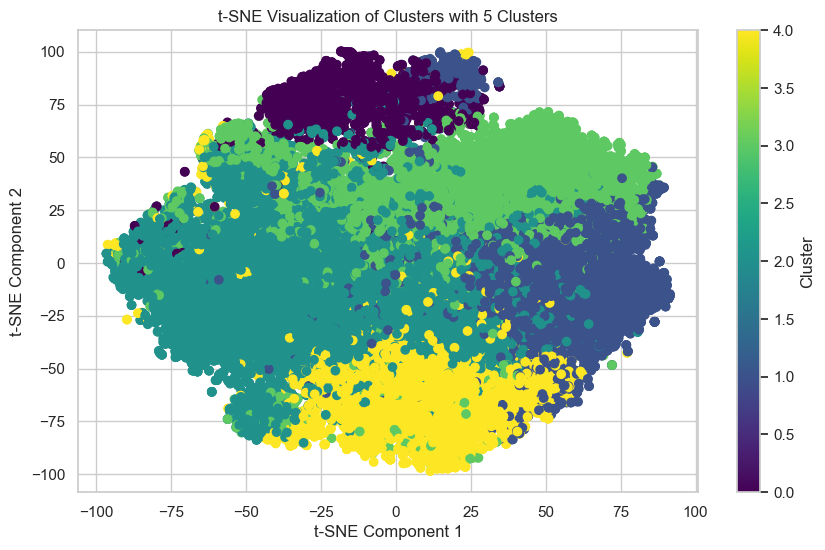

In [50]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_array)

plt.figure(figsize=(10, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels_optimal, cmap='viridis', marker='o')
plt.title(f't-SNE Visualization of Clusters with {optimal_k} Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()